In [1]:
!pip install ClusterEnsembles

In [2]:
import numpy as np
import ClusterEnsembles as CE 
import random

# Data Preprocessing

In [3]:
W = []
f = open("/content/Gavin_PPI.txt","r")
for line in f:
  for j in line.split():
    if j not in W:
      W.append(j)
f.close()

In [4]:
f = open("/content/R1.txt","r")
for line in f:
  for j in line.split():
    if j != line.split()[len(line.split())-1]:
       if j[0:len(j)-1] not in W:
            W.append(j[0:len(j)-1])
    else:
      if j not in W:
        W.append(j)
f.close()

In [5]:
f = open("/content/R2.txt","r")
for line in f:
  for j in line.split():
    if j not in W:
      W.append(j)
f.close()

In [6]:
f = open("/content/R3.txt","r")
for line in f:
  for j in line.split():
    if j not in W:
      W.append(j)
f.close()

In [7]:
f = open("/content/R4.txt","r")
for line in f:
  for j in line.split():
    if j not in W:
      W.append(j)
f.close()

In [8]:
P1 = []
f = open("/content/R1.txt","r")
for k,line in enumerate(f):
  P1k = []
  for j in line.split():
    if j != line.split()[len(line.split())-1]:
        P1k.append(j[0:len(j)-1])
    else:
        P1k.append(j)
  P1.append(P1k)
f.close()

In [9]:
P2 = []
f = open("/content/R2.txt","r")
for k,line in enumerate(f):
  P2k = []
  for j in line.split():
    P2k.append(j)
  P2.append(P2k)
f.close()

In [10]:
P3 = []
f = open("/content/R3.txt","r")
for k,line in enumerate(f):
  P3k = []
  for j in line.split():
    P3k.append(j)
  P3.append(P3k)
f.close()

In [11]:
P4 = []
f = open("/content/R4.txt","r")
for k,line in enumerate(f):
  P4k = []
  for j in line.split():
    P4k.append(j)
  P4.append(P4k)
f.close()

In [12]:
GP1 = {}
for i in P1:
  for j in i:
    if j not in GP1:
      GP1[j] = [P1.index(i)+1]
    else:
      GP1[j].append(P1.index(i)+1)
print(len(GP1))
for i in [item for item in  W if item not in list(GP1.keys())]:
  GP1[i] = [0]
print(len(GP1))

602
1430


In [13]:
GP2 = {}
for i in P2:
  for j in i:
    if str(j) not in GP2:
      GP2[str(j)] = [P2.index(i)+1]
    else:
      GP2[str(j)].append(P2.index(i)+1)
print(len(GP2))
for i in [item for item in  W if item not in list(GP2.keys())]:
  GP2[i] = [0]
print(len(GP2))

229
1430


In [14]:
GP3 = {}
for i in P3:
  for j in i:
    if str(j) not in GP3:
      GP3[str(j)] = [P3.index(i)+1]
    else:
      GP3[str(j)].append(P3.index(i)+1)
print(len(GP3))
for i in [item for item in  W if item not in list(GP3.keys())]:
  GP3[i] = [0]
print(len(GP3))

1266
1430


In [15]:
GP4 = {}
for i in P4:
  for j in i:
    if str(j) not in GP4:
      GP4[str(j)] = [P4.index(i)+1]
    else:
      GP4[str(j)].append(P4.index(i)+1)
print(len(GP4))
for i in [item for item in  W if item not in list(GP4.keys())]:
  GP4[i] = [0]
print(len(GP4))

646
1430


In [16]:
L1 = []
import random
for i in W:
  if len(GP1[i]) >1:
    p = min(GP1[i])
    L1.append(p)
  else:
    if GP1[i][0] ==0:
      L1.append(np.nan)
    else:
      L1.append(GP1[i][0])

In [17]:
L2 = []
import random
for i in W:
  if len(GP2[i]) >1:
    p = min(GP2[i])
    L2.append(p)
  else:
    if GP2[i][0] ==0:
      L2.append(np.nan)
    else:
      L2.append(GP2[i][0])

In [18]:
L3 = []
import random
for i in W:
  if len(GP3[i]) >1:
    p = min(GP3[i])
    L3.append(p)
  else:
    if GP3[i][0] ==0:
      L3.append(np.nan)
    else:
      L3.append(GP3[i][0])

In [19]:
L4 = []
for i in W:
  if len(GP4[i]) >1:
    p = min(GP4[i])
    L4.append(p)
  else:
    if GP4[i][0] ==0:
      L4.append(np.nan)
    else:
      L4.append(GP4[i][0])

In [20]:
k = (len(P1)+ len(P2)+len(P3)+ len(P4))/4
int(k)

159

In [21]:
base_cluster1 = np.array(L1)
base_cluster2 = np.array(L2)
base_cluster3 = np.array(L3)
base_cluster4 = np.array(L4) # `np.nan`: missing value
base_clusters = np.array([base_cluster1, base_cluster2, base_cluster3, base_cluster4])
celabel = CE.cluster_ensembles(base_clusters, nclass=int(k), solver='hbgf')
print(celabel)

[39 45 40 ... 90 90 90]


In [22]:
GP = {}
for i,j in zip(W,list(celabel)):
  GP[i] = j.item()

# Post Processing

In [23]:
Node_Zero = []
for i in GP:
  # for j in GP[i]:
    if GP[i]==0:
      Node_Zero.append(i)
for i in Node_Zero:
  GP.pop(i)

In [24]:
count = 0
for i in GP:
  # for j in GP[i]:
    if count<GP[i]:
      count = GP[i]
P = []
for i in range(count):
  P.append([])

In [25]:
for i in GP:
  k = GP[i]
  P[k-1].append(i)

In [26]:
L = []
for i in P:
  # print(i)
  if len(i)>1:
    L.append(i)

# Writing Final Result

In [27]:
with open('final_result.txt', 'w') as f:
    for item in L:
      for j in item:
        f.write(j + '\t')
      f.write("\n")

# ***Evaluation Metrics***

Total Known Complexes (Reference One)

In [28]:
L = []
f = open("/content/Cmplx.Gavin.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

82


Total Predicted Complexes

In [29]:
R = []
g = open("/content/final_result.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

158


Checking for Overlapping Scores and calculating number of matching sets

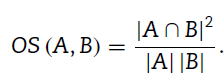

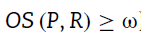

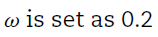

In [30]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if (len(i)*len(j)) !=0:
      if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
j:  50
i:  127
j:  51
i:  127
j:  52
i:  127
j:  53
i:  127
j:  54
i:  127
j:  55
i:  127
j:  56
i:  127
j:  57
i:  127
j:  58
i:  127
j:  59
i:  127
j:  60
i:  127
j:  61
i:  127
j:  62
i:  127
j:  63
i:  127
j:  64
i:  127
j:  65
i:  127
j:  66
i:  127
j:  67
i:  127
j:  68
i:  127
j:  69
i:  127
j:  70
i:  127
j:  71
i:  127
j:  72
i:  127
j:  73
i:  127
j:  74
i:  127
j:  75
i:  127
j:  76
i:  127
j:  77
i:  127
j:  78
i:  127
j:  79
i:  127
j:  80
i:  127
j:  81
i:  128
j:  0
i:  128
j:  1
i:  128
j:  2
i:  128
j:  3
i:  128
j:  4
i:  128
j:  5
i:  128
j:  6
i:  128
j:  7
i:  128
j:  8
i:  128
j:  9
i:  128
j:  10
i:  128
j:  11
i:  128
j:  12
i:  128
j:  13
i:  128
j:  14
i:  128
j:  15
i:  128
j:  16
i:  128
j:  17
i:  128
j:  18
i:  128
j:  19
i:  128
j:  20
i:  128
j:  21
i:  128
j:  22
i:  128
j:  23
i:  128
j:  24
i:  128
j:  25
i:  128
j:  26
i:  128
j:  27
i:  128
j:  28
i:  128
j:  29
i:  128
j:  30
i:  128
j:  31
i:  128

Known Matched Complexes

In [31]:
print(len(M_L))

60


Predicted Matched Complexes



In [32]:
print(len(M_R))

66


Recall

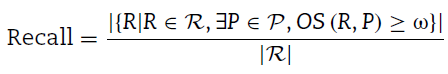

In [33]:
r = len(M_R)/len(R)
print(r)

0.4177215189873418


Precision

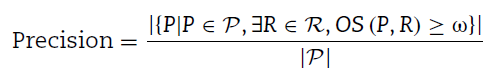

In [34]:
p = len(M_L)/len(L)
print(p)

0.7317073170731707


f-measure

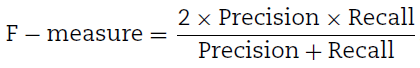

In [35]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

0.5318291700241741


# ***Evaluation Metrics***

Total Known Complexes (Reference One)

In [75]:
L = []
f = open("/content/Cmplx.Gavin.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

82


Total Predicted Complexes

In [76]:
R = []
g = open("/content/R1.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

66


Checking for Overlapping Scores and calculating number of matching sets

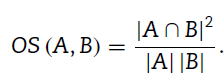

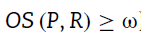

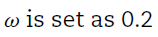

In [77]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if (len(i)*len(j)) !=0:
      if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
i:  35
j:  42
i:  35
j:  43
i:  35
j:  44
i:  35
j:  45
i:  35
j:  46
i:  35
j:  47
i:  35
j:  48
i:  35
j:  49
i:  35
j:  50
i:  35
j:  51
i:  35
j:  52
i:  35
j:  53
i:  35
j:  54
i:  35
j:  55
i:  35
j:  56
i:  35
j:  57
i:  35
j:  58
i:  35
j:  59
i:  35
j:  60
i:  35
j:  61
i:  35
j:  62
i:  35
j:  63
i:  35
j:  64
i:  35
j:  65
i:  35
j:  66
i:  35
j:  67
i:  35
j:  68
i:  35
j:  69
i:  35
j:  70
i:  35
j:  71
i:  35
j:  72
i:  35
j:  73
i:  35
j:  74
i:  35
j:  75
i:  35
j:  76
i:  35
j:  77
i:  35
j:  78
i:  35
j:  79
i:  35
j:  80
i:  35
j:  81
i:  36
j:  0
i:  36
j:  1
i:  36
j:  2
i:  36
j:  3
i:  36
j:  4
i:  36
j:  5
i:  36
j:  6
i:  36
j:  7
i:  36
j:  8
i:  36
j:  9
i:  36
j:  10
i:  36
j:  11
i:  36
j:  12
i:  36
j:  13
i:  36
j:  14
i:  36
j:  15
i:  36
j:  16
i:  36
j:  17
i:  36
j:  18
i:  36
j:  19
i:  36
j:  20
i:  36
j:  21
i:  36
j:  22
i:  36
j:  23
i:  36
j:  24
i:  36
j:  25
i:  36
j:  26
i:  36
j:  27
i:  36


Known Matched Complexes

In [71]:
print(len(M_L))

0


Predicted Matched Complexes



In [72]:
print(len(M_R))

0


Recall

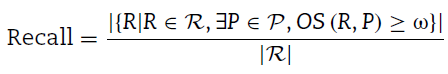

In [73]:
r = len(M_R)/len(R)
print(r)

0.0


Precision

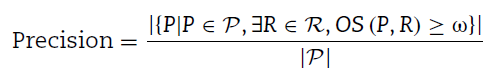

In [74]:
p = len(M_L)/len(L)
print(p)

0.0


f-measure

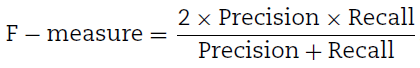

In [43]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

ZeroDivisionError: ignored

# ***Evaluation Metrics***

Total Known Complexes (Reference One)

In [44]:
L = []
f = open("/content/Cmplx.Gavin.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

82


Total Predicted Complexes

In [45]:
R = []
g = open("/content/R2.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

124


Checking for Overlapping Scores and calculating number of matching sets

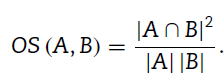

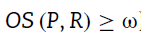

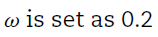

In [46]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if (len(i)*len(j)) !=0:
      if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
j:  46
i:  93
j:  47
i:  93
j:  48
i:  93
j:  49
i:  93
j:  50
i:  93
j:  51
i:  93
j:  52
i:  93
j:  53
i:  93
j:  54
i:  93
j:  55
i:  93
j:  56
i:  93
j:  57
i:  93
j:  58
i:  93
j:  59
i:  93
j:  60
i:  93
j:  61
i:  93
j:  62
i:  93
j:  63
i:  93
j:  64
i:  93
j:  65
i:  93
j:  66
i:  93
j:  67
i:  93
j:  68
i:  93
j:  69
i:  93
j:  70
i:  93
j:  71
i:  93
j:  72
i:  93
j:  73
i:  93
j:  74
i:  93
j:  75
i:  93
j:  76
i:  93
j:  77
i:  93
j:  78
i:  93
j:  79
i:  93
j:  80
i:  93
j:  81
i:  94
j:  0
i:  94
j:  1
i:  94
j:  2
i:  94
j:  3
i:  94
j:  4
i:  94
j:  5
i:  94
j:  6
i:  94
j:  7
i:  94
j:  8
i:  94
j:  9
i:  94
j:  10
i:  94
j:  11
i:  94
j:  12
i:  94
j:  13
i:  94
j:  14
i:  94
j:  15
i:  94
j:  16
i:  94
j:  17
i:  94
j:  18
i:  94
j:  19
i:  94
j:  20
i:  94
j:  21
i:  94
j:  22
i:  94
j:  23
i:  94
j:  24
i:  94
j:  25
i:  94
j:  26
i:  94
j:  27
i:  94
j:  28
i:  94
j:  29
i:  94
j:  30
i:  94
j:  31
i:  94
j:  32


Known Matched Complexes

In [47]:
print(len(M_L))

10


Predicted Matched Complexes



In [48]:
print(len(M_R))

15


Recall

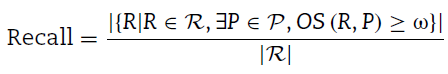

In [49]:
r = len(M_R)/len(R)
print(r)

0.12096774193548387


Precision

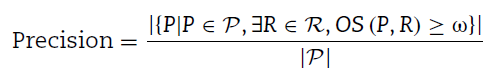

In [50]:
p = len(M_L)/len(L)
print(p)

0.12195121951219512


f-measure

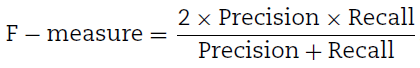

In [51]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

0.1214574898785425


# ***Evaluation Metrics***

Total Known Complexes (Reference One)

In [52]:
L = []
f = open("/content/Cmplx.Gavin.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

82


Total Predicted Complexes

In [53]:
R = []
g = open("/content/R3.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

243


Checking for Overlapping Scores and calculating number of matching sets

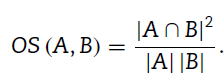

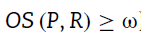

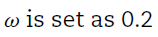

In [54]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if (len(i)*len(j)) !=0:
      if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
j:  44
i:  212
j:  45
i:  212
j:  46
i:  212
j:  47
i:  212
j:  48
i:  212
j:  49
i:  212
j:  50
i:  212
j:  51
i:  212
j:  52
i:  212
j:  53
i:  212
j:  54
i:  212
j:  55
i:  212
j:  56
i:  212
j:  57
i:  212
j:  58
i:  212
j:  59
i:  212
j:  60
i:  212
j:  61
i:  212
j:  62
i:  212
j:  63
i:  212
j:  64
i:  212
j:  65
i:  212
j:  66
i:  212
j:  67
i:  212
j:  68
i:  212
j:  69
i:  212
j:  70
i:  212
j:  71
i:  212
j:  72
i:  212
j:  73
i:  212
j:  74
i:  212
j:  75
i:  212
j:  76
i:  212
j:  77
i:  212
j:  78
i:  212
j:  79
i:  212
j:  80
i:  212
j:  81
i:  213
j:  0
i:  213
j:  1
i:  213
j:  2
i:  213
j:  3
i:  213
j:  4
i:  213
j:  5
i:  213
j:  6
i:  213
j:  7
i:  213
j:  8
i:  213
j:  9
i:  213
j:  10
i:  213
j:  11
i:  213
j:  12
i:  213
j:  13
i:  213
j:  14
i:  213
j:  15
i:  213
j:  16
i:  213
j:  17
i:  213
j:  18
i:  213
j:  19
i:  213
j:  20
i:  213
j:  21
i:  213
j:  22
i:  213
j:  23
i:  213
j:  24
i:  213
j:  25
i:  213

Known Matched Complexes

In [55]:
print(len(M_L))

68


Predicted Matched Complexes



In [56]:
print(len(M_R))

82


Recall

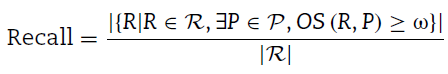

In [57]:
r = len(M_R)/len(R)
print(r)

0.3374485596707819


Precision

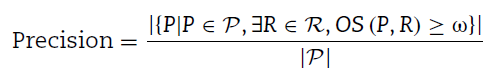

In [58]:
p = len(M_L)/len(L)
print(p)

0.8292682926829268


f-measure

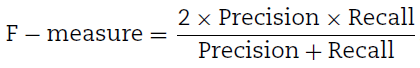

In [59]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

0.4796971782518927


# ***Evaluation Metrics***

Total Known Complexes (Reference One)

In [60]:
L = []
f = open("/content/Cmplx.Gavin.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

82


Total Predicted Complexes

In [61]:
R = []
g = open("/content/R4.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

206


Checking for Overlapping Scores and calculating number of matching sets

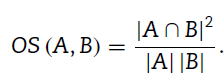

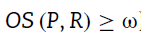

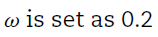

In [62]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if (len(i)*len(j)) !=0:
      if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
j:  48
i:  175
j:  49
i:  175
j:  50
i:  175
j:  51
i:  175
j:  52
i:  175
j:  53
i:  175
j:  54
i:  175
j:  55
i:  175
j:  56
i:  175
j:  57
i:  175
j:  58
i:  175
j:  59
i:  175
j:  60
i:  175
j:  61
i:  175
j:  62
i:  175
j:  63
i:  175
j:  64
i:  175
j:  65
i:  175
j:  66
i:  175
j:  67
i:  175
j:  68
i:  175
j:  69
i:  175
j:  70
i:  175
j:  71
i:  175
j:  72
i:  175
j:  73
i:  175
j:  74
i:  175
j:  75
i:  175
j:  76
i:  175
j:  77
i:  175
j:  78
i:  175
j:  79
i:  175
j:  80
i:  175
j:  81
i:  176
j:  0
i:  176
j:  1
i:  176
j:  2
i:  176
j:  3
i:  176
j:  4
i:  176
j:  5
i:  176
j:  6
i:  176
j:  7
i:  176
j:  8
i:  176
j:  9
i:  176
j:  10
i:  176
j:  11
i:  176
j:  12
i:  176
j:  13
i:  176
j:  14
i:  176
j:  15
i:  176
j:  16
i:  176
j:  17
i:  176
j:  18
i:  176
j:  19
i:  176
j:  20
i:  176
j:  21
i:  176
j:  22
i:  176
j:  23
i:  176
j:  24
i:  176
j:  25
i:  176
j:  26
i:  176
j:  27
i:  176
j:  28
i:  176
j:  29
i:  176

Known Matched Complexes

In [63]:
print(len(M_L))

58


Predicted Matched Complexes



In [64]:
print(len(M_R))

101


Recall

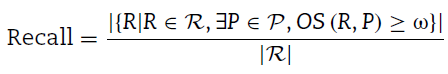

In [65]:
r = len(M_R)/len(R)
print(r)

0.49029126213592233


Precision

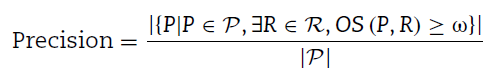

In [66]:
p = len(M_L)/len(L)
print(p)

0.7073170731707317


f-measure

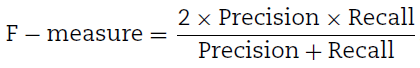

In [67]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

0.5791398912506179
